#### https://www.youtube.com/watch?v=KTeVOb8gaD4

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt

In [4]:
digits = datasets.load_digits()

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.target[0]

0

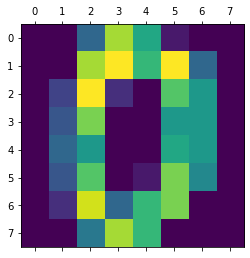

In [8]:
plt.matshow(digits.images[0])

In [9]:
model = svm.SVC()

In [11]:
x = digits.data[:]

In [12]:
y = digits.target[:]

In [14]:
model.fit(x, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
model.predict([digits.data[0]])

array([0])

Actual: 5, Predicted:9


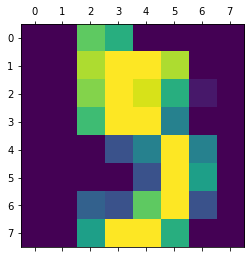

In [17]:
# some examples of where the prediction is incorrect

for i in range(0, 20):
    if digits.target[i] != model.predict([digits.data[i]])[0]:
        plt.matshow(digits.images[i])
        print(f'Actual: {digits.target[i]}, Predicted:{model.predict([digits.data[i]])[0]}')

#### https://www.youtube.com/watch?v=FB5EdxAGxQg

In [18]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()

In [20]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [21]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [22]:
iris.target[0]

0

In [23]:
iris.target_names[0]

'setosa'

In [25]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
df['target'] = iris.target

In [28]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
x = df.drop(['target'], axis='columns')

In [31]:
y = df['target']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
model = svm.SVC()

In [37]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_predicted = model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_predicted, y_test)

0.9333333333333333

#### https://www.youtube.com/watch?v=7sz4WpkUIIs

In [41]:
df = pd.read_csv('cell_samples.csv')

In [42]:
df.sample(n=3)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
338,704097,1,1,1,1,1,1,2,1,1,2
117,1173509,4,5,5,10,4,10,7,5,8,4
8,1033078,2,1,1,1,2,1,1,1,5,2


In [43]:
df.shape

(699, 11)

In [44]:
df.dtypes # shows that BareNuc is not numeric, so can't be directly used in the machine learning model

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [52]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [58]:
df['BareNuc'] = df['BareNuc'].astype(int)

In [59]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [61]:
x = df.drop(['ID', 'Class'], axis='columns')

In [62]:
x.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [63]:
y = df['Class']

In [65]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [67]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
y_predicted = model.predict(x_test)

In [69]:
accuracy_score(y_predicted, y_test)

0.9927007299270073

In [70]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_predicted, y_test))

              precision    recall  f1-score   support

           2       1.00      0.99      0.99        88
           4       0.98      1.00      0.99        49

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

